In [1]:
import mne
import numpy as np
import os

from autoreject import AutoReject

In [2]:
mne.set_log_level('error') 
data_dir = "Processed"

In [3]:
p_num = 2

In [4]:
raw = mne.io.read_raw_fif(f"{data_dir}-Better/P{p_num}/P{p_num}-filt-raw.fif", preload=True)
montage = "standard_1020"
raw.set_montage(montage)  

<Raw | P2-filt-raw.fif, 8 x 584555 (2338.2 s), ~35.7 MiB, data loaded>

In [5]:
events = mne.read_events(f"{data_dir}-Better/P{p_num}/P{p_num}_eve.fif")

In [6]:
print(events[0])
# start = events[0, 0] / raw.info['sfreq']
# samples_removed = int(start * raw.info['sfreq'])
# events[:, 0] += samples_removed
# print(events[0])

[95719     0     6]


In [7]:
unique_events, counts = np.unique(events[:, 2], return_counts=True)

In [8]:
event_id = {}
if 1 in unique_events:
    event_id['TP'] = 1
if 2 in unique_events:
    event_id['FN'] = 2
if 3 in unique_events:
    event_id['FP'] = 3
if 4 in unique_events:
    event_id['TN'] = 4
if 5 in unique_events:
    event_id['Clench'] = 5
event_id

{'TP': 1, 'FN': 2, 'FP': 3, 'TN': 4}

In [9]:
epochs = mne.Epochs(
    raw=raw,
    events=events,
    event_id=event_id,
    tmin=-0.5,  # Time before event (in seconds)
    tmax=3,   # Time after event (in seconds)
    baseline=(None, 0),  # Baseline correction period
    picks=None,  # All channels
    preload=True  # Load data into memory
)

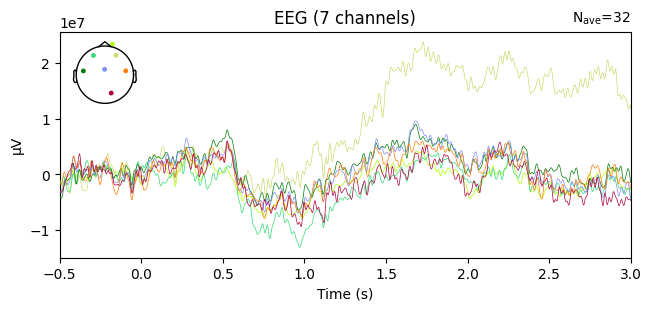

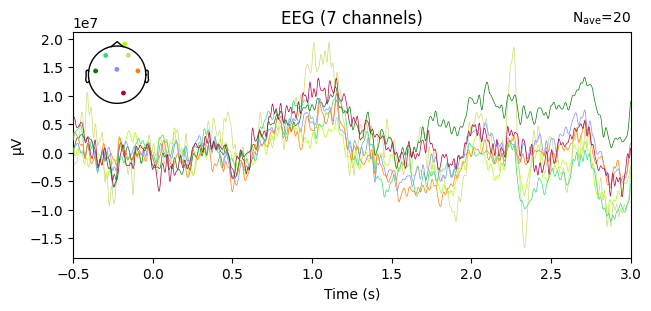

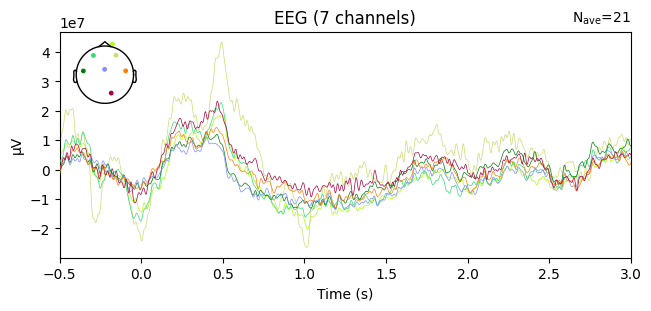

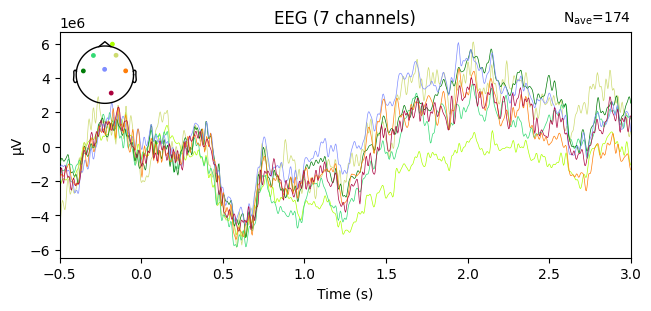

In [10]:
for k, v in event_id.items():
    epochs[k].average().plot();

In [12]:
ica = mne.preprocessing.read_ica(f"{data_dir}-Better/P{p_num}/P{p_num}-ica.fif")

# apply the ICA decomposition (excluding the marked ICs) to the epochs
epochs_postica = ica.apply(epochs.copy())

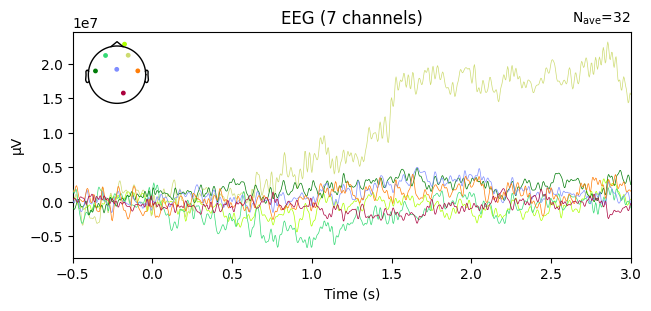

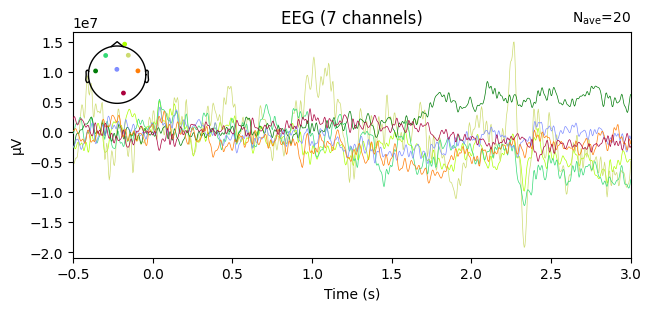

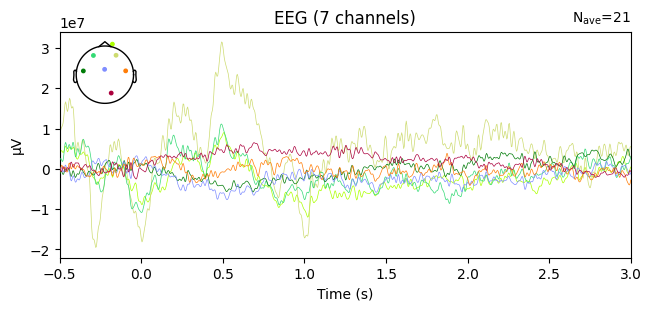

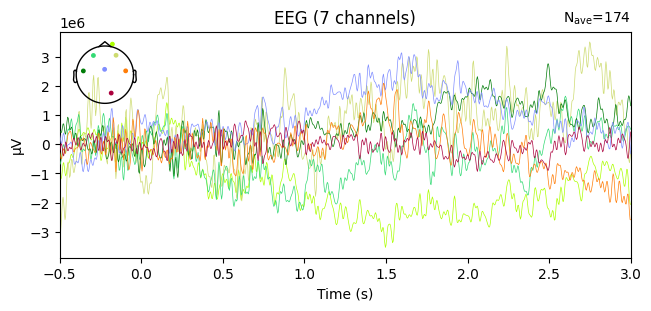

In [13]:
for k, v in event_id.items():
    epochs_postica[k].average().plot();